In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report 
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
data = pd.read_csv("pima.csv")

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Number of times pregnant    768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              755 non-null    object 
 3   Tricep skin                 766 non-null    object 
 4   insulin                     766 non-null    object 
 5   BMI                         753 non-null    object 
 6   Diabetes pedigree function  767 non-null    float64
 7   Age                         768 non-null    int64  
 8   Class                       768 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 54.1+ KB
None


In [5]:
# Hàm kiểm tra xem một giá trị có phải là số hay không
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

# Duyệt qua tất cả các ô trong DataFrame và xoá các ô chứa kí tự
for col in data.columns:
    for index, value in data[col].items():
        if not is_number(value):
            data.at[index, col] = None

# Lưu DataFrame đã xoá dữ liệu vào file Excel mới
output_file_path = 'path_to_output_excel_file.xlsx'
data.to_excel(output_file_path, index=False)


In [6]:
data1= pd.read_csv("path_to_output_excel_file.csv")
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Number of times pregnant    768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              754 non-null    float64
 3   Tricep skin                 765 non-null    float64
 4   insulin                     764 non-null    float64
 5   BMI                         752 non-null    float64
 6   Diabetes pedigree function  767 non-null    float64
 7   Age                         768 non-null    int64  
 8   Class                       768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB
None


In [8]:
target = "Class"
x = data1.drop(target, axis=1)
y = data1[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)



In [9]:
num_transformer = SimpleImputer(strategy="median")
result1 = num_transformer.fit_transform(x_train)
result2 = num_transformer.transform(x_test)

In [29]:
scaler = StandardScaler()
x_train = scaler.fit_transform(result1)
x_test = scaler.transform(result2)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



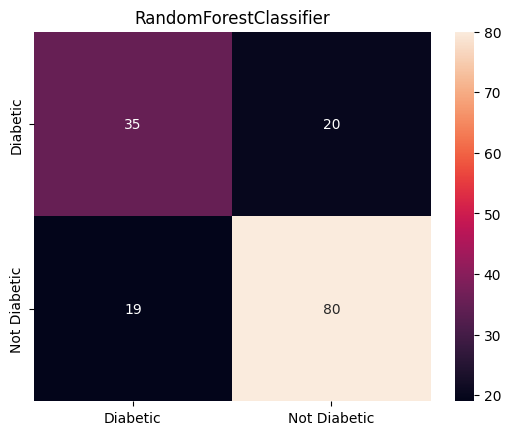

In [34]:
cls1 = RandomForestClassifier()
cls1.fit(x_train,y_train)
y_predict1 = cls1.predict(x_test)
print(classification_report(y_test, y_predict1))
cm = np.array(confusion_matrix(y_test, y_predict1, labels=[1,0]))
confusion = pd.DataFrame(cm, index=[ "Diabetic","Not Diabetic"], columns=["Diabetic","Not Diabetic"])
sn.heatmap(confusion, annot=True)
plt.title("RandomForestClassifier")
plt.savefig("RandomForestClassifier")
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



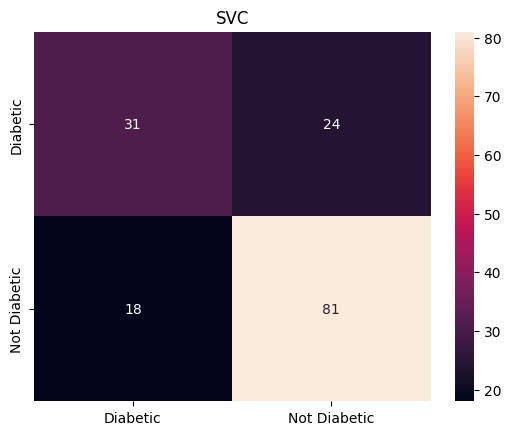

In [37]:
cls2 = SVC()
cls2.fit(x_train,y_train)
y_predict2 = cls2.predict(x_test)
print(classification_report(y_test, y_predict2))
cm = np.array(confusion_matrix(y_test, y_predict2, labels=[1, 0]))
confusion = pd.DataFrame(cm, index=["Diabetic", "Not Diabetic"], columns=["Diabetic", "Not Diabetic"])
sn.heatmap(confusion, annot=True)
plt.title("SVC")
plt.savefig("SVC")
plt.show()

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        99
           1       0.60      0.55      0.57        55

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154



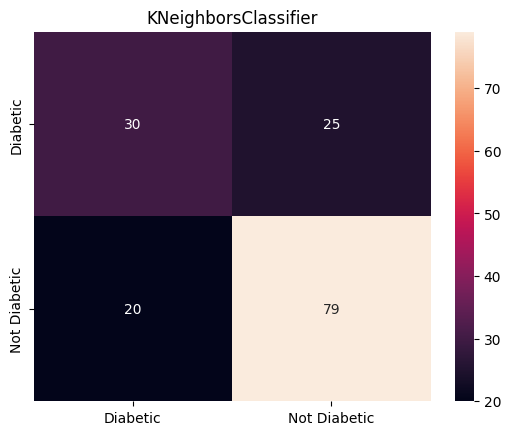

In [38]:
cls3 = KNeighborsClassifier()
cls3.fit(x_train,y_train)
y_predict3 = cls3.predict(x_test)
print(classification_report(y_test, y_predict3))
cm = np.array(confusion_matrix(y_test, y_predict3, labels=[1, 0]))
confusion = pd.DataFrame(cm, index=["Diabetic", "Not Diabetic"], columns=["Diabetic", "Not Diabetic"])
sn.heatmap(confusion, annot=True)
plt.title("KNeighborsClassifier")
plt.savefig("KNeighborsClassifier")
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.64      0.75      0.69        55

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154



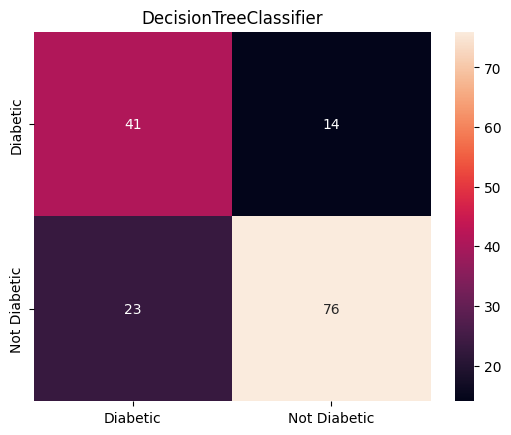

In [39]:
cls4 = DecisionTreeClassifier()
cls4.fit(x_train,y_train)
y_predict4 = cls4.predict(x_test)
print(classification_report(y_test, y_predict4))
cm = np.array(confusion_matrix(y_test, y_predict4, labels=[1, 0]))
confusion = pd.DataFrame(cm, index=["Diabetic", "Not Diabetic"], columns=["Diabetic", "Not Diabetic"])
sn.heatmap(confusion, annot=True)
plt.title("DecisionTreeClassifier")
plt.savefig("DecisionTreeClassifier")
plt.show()
